<a href="https://colab.research.google.com/github/monteroanibal/diplomado_GEOIA_IGAC2025/blob/main/Basico_Modulo_17_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jupyter Notebook de la sesión

---

# 1. Cargue de librerías

Para explorar archivos y borrarlos.

In [16]:
import glob
import os
import shutil

Para manipular objetos y métodos de Numpy.

In [17]:
import numpy as np

Para importar los ráster (rasterio). la función show permite graficar los ráster de una forma básica.

In [18]:
%%capture
!pip install rasterio
import rasterio as rs
from rasterio.plot import show

Para construir los datasets de entrada de los modelos PCA y Random Forest.

In [19]:
import pandas as pd

Para implementar el modelo de Random Forest.

In [20]:
from sklearn.ensemble import RandomForestRegressor

Para graficar la importancia de las variables del modelo Random Forest.

In [21]:
%%capture
!pip install rfpimp
from rfpimp import *

Para seleccionar una semilla.

In [22]:
import random

Para realizar el PCA.

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Para graficar y guardar las salidas del PCA.

In [24]:
%%capture
!pip install bioinfokit
from bioinfokit.visuz import cluster

In [25]:
from IPython.display import Image, display

# 2. Lectura y primera exploración de datos ráster



Se descargan las capas que están publicadas en un Github y se descomprimen en la sesión actual.

In [26]:
%%capture
!wget https://github.com/monteroanibal/diplomado_GEOIA_IGAC2025/raw/refs/heads/main/Insumos/Basico_Modulo_17_Datos/Basico_Modulo_17_rasters.zip
!unzip -o /content/Basico_Modulo_17_rasters.zip
!rm /content/Basico_Modulo_17_rasters.zip

Primero, se almacenan los nombres de las capas en una lista, tal y como se encuentran los nombres de los archivos, sin incluir la extensión .tif.

In [27]:
dirs_capas = glob.glob('/content/Basico_Modulo_17_rasters/*.tif*')
f = '/content/Basico_Modulo_17_rasters/Sentinel2_MSI_Level2A_Chiia_2018.tif'
dirs_capas = [x for x in dirs_capas if x != f]

Se genera una lista con los nombres de las capas.

In [28]:
capas = [ os.path.splitext( os.path.split(dir)[1] )[0] for dir in dirs_capas ]

Se cargan las capas de forma iterativa al leer la lista de los nombres de los archivos. Las capas en .tif quedan cargadas en la sesión con el respectivo nombre del archivo. La función globals() permite asignar un nombre a una variable a partir de una cadena de caracteres.

In [29]:
for nom, dir in zip(capas[:19],dirs_capas[:19]):
  globals()[ nom ] = rs.open( dir ).read()[0]
del dirs_capas

Debido a que las diferentes bandas de sentinel (B4, B3, B2) se encuentran en un mismo .tif, estas no se incluyen en la iteración y se importa cada banda de forma individual.

In [30]:
capas = capas + ['Sentinel2_MSI_Level2A_Chiia_2018_B4','Sentinel2_MSI_Level2A_Chiia_2018_B3','Sentinel2_MSI_Level2A_Chiia_2018_B2']
globals()[ 'Sentinel2_MSI_Level2A_Chiia_2018_B4' ] = rs.open( f ).read()[0]
globals()[ 'Sentinel2_MSI_Level2A_Chiia_2018_B3' ] = rs.open( f ).read()[1]
globals()[ 'Sentinel2_MSI_Level2A_Chiia_2018_B2' ] = rs.open( f ).read()[2]

Se verifica que las capas queden cargadas en la sesión con el respectivo nombre del archivo. Los nombres de las capas también quedan almacenados en la siguiente lista.

In [31]:
capas

['Areas_excluidas_Proteccion_Hidrica_Rond_Rio',
 'Areas_excluidas_Proteccion_Hidrica_Ronda_Humedales',
 'Areas_excluidas_Proteccion_Hidrica_Ronda_Nacimientos',
 'Red_Energia_Alta_Tension',
 'Red_Acueducto_Diam_Menor_60',
 'Red_Alcantarillado_Combinado',
 'Red_Acueducto_Diam_Mayor_60',
 'Red_Energia_Media_Tension',
 'Areas_excluidas_Cuerpo_Agua',
 'Red_Alcantarillado_Sanitario',
 'DEM_correccion',
 'Areas_excluidas_Resguardo',
 'Censo_DANE_2018_Count_Pixel',
 'Red_Gas_Natural_Domiciliaria1',
 'Red_Alcantarillado_Pluvial',
 'Red_Gas_Natural_Distribucion',
 'Red_Energia_Baja_Tension',
 'Areas_excluidas_Proteccion_Hidrica_Ronda_Quebradas',
 'Areas_excluidas_Zona_Proteccion',
 'Sentinel2_MSI_Level2A_Chiia_2018_B4',
 'Sentinel2_MSI_Level2A_Chiia_2018_B3',
 'Sentinel2_MSI_Level2A_Chiia_2018_B2']

Se verifica que se importaron los archivos bien, sumando los valores de los arrays de las capas.

Se utiliza la funcion globals() de manera análoga a la función globals(), esta vez, para invocar una variable a partir de una cadena de caracteres que lleva su nombre.

Se grafican los rásters importados, con la función show().

Areas_excluidas_Proteccion_Hidrica_Rond_Rio:


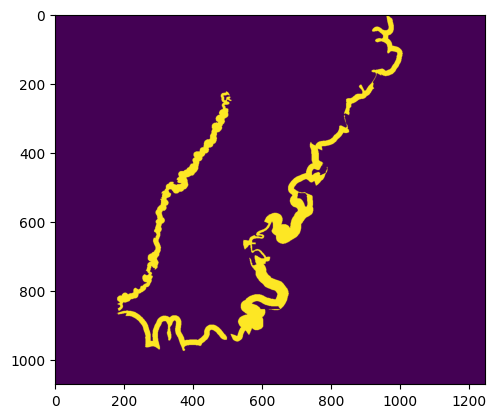

Axes(0.176343,0.11;0.672313x0.77)
 
Areas_excluidas_Proteccion_Hidrica_Ronda_Humedales:


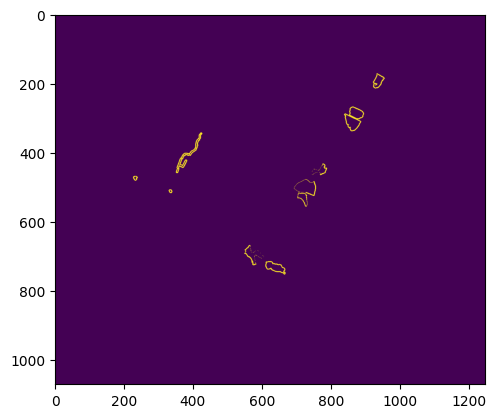

Axes(0.176343,0.11;0.672313x0.77)
 
Areas_excluidas_Proteccion_Hidrica_Ronda_Nacimientos:


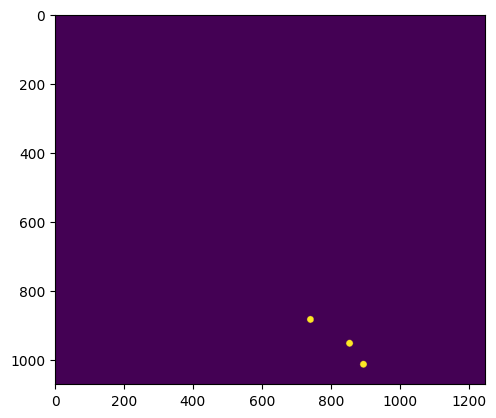

Axes(0.176343,0.11;0.672313x0.77)
 
Red_Energia_Alta_Tension:


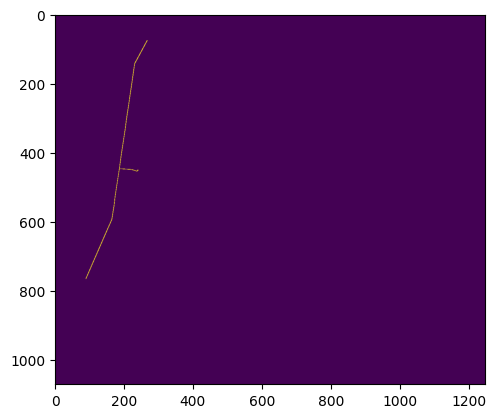

Axes(0.176343,0.11;0.672313x0.77)
 
Red_Acueducto_Diam_Menor_60:


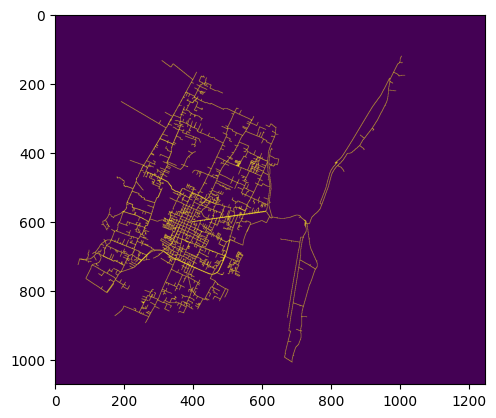

Axes(0.176343,0.11;0.672313x0.77)
 
Red_Alcantarillado_Combinado:


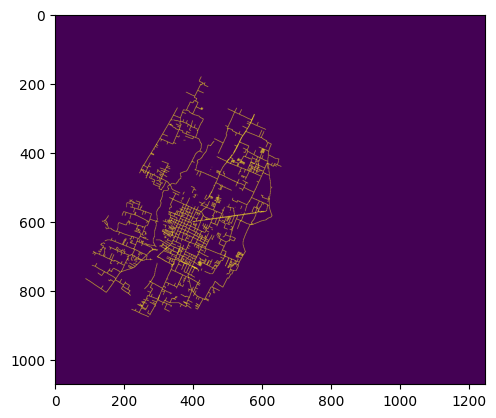

Axes(0.176343,0.11;0.672313x0.77)
 
Red_Acueducto_Diam_Mayor_60:


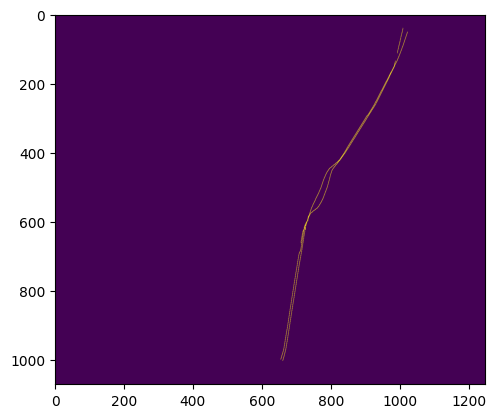

Axes(0.176343,0.11;0.672313x0.77)
 
Red_Energia_Media_Tension:


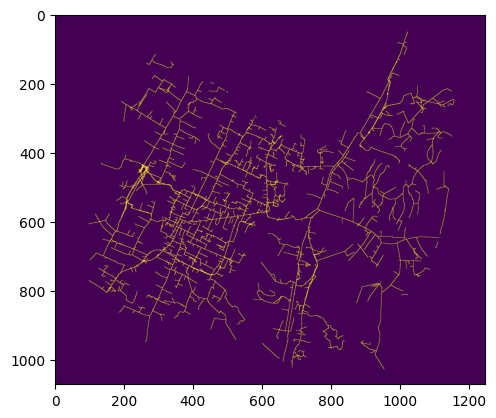

Axes(0.176343,0.11;0.672313x0.77)
 
Areas_excluidas_Cuerpo_Agua:


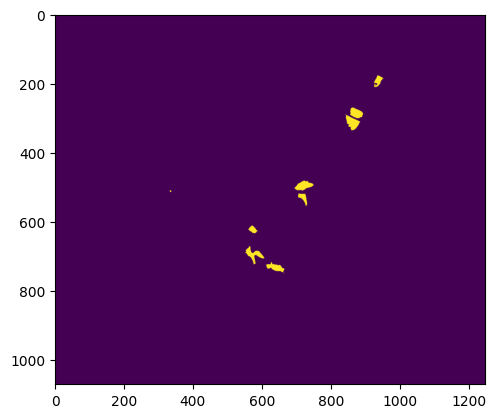

Axes(0.176343,0.11;0.672313x0.77)
 
Red_Alcantarillado_Sanitario:


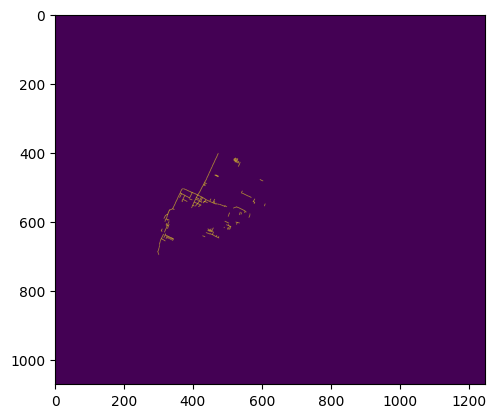

Axes(0.176343,0.11;0.672313x0.77)
 
DEM_correccion:


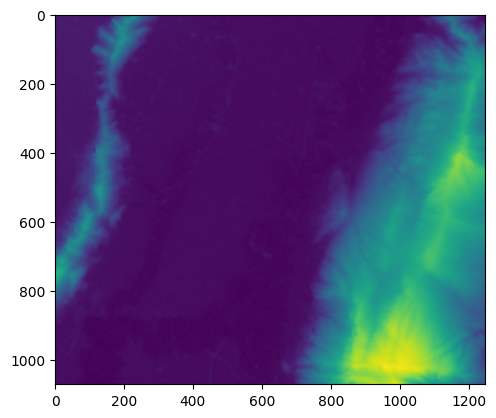

Axes(0.176343,0.11;0.672313x0.77)
 
Areas_excluidas_Resguardo:


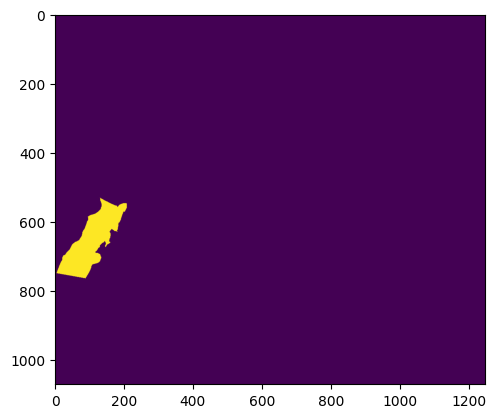

Axes(0.176343,0.11;0.672313x0.77)
 
Censo_DANE_2018_Count_Pixel:


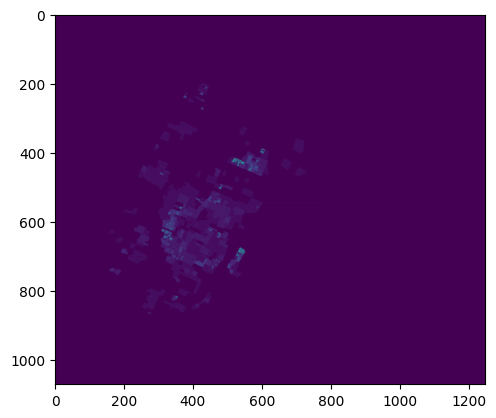

Axes(0.176343,0.11;0.672313x0.77)
 
Red_Gas_Natural_Domiciliaria1:


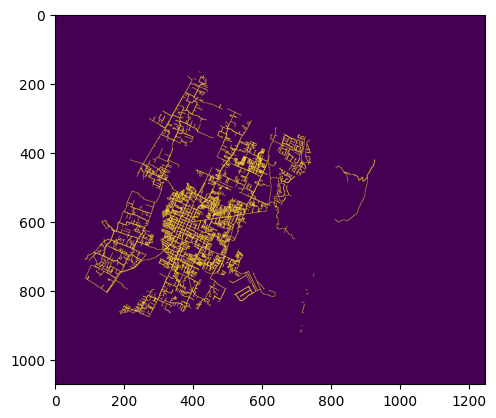

Axes(0.176343,0.11;0.672313x0.77)
 
Red_Alcantarillado_Pluvial:


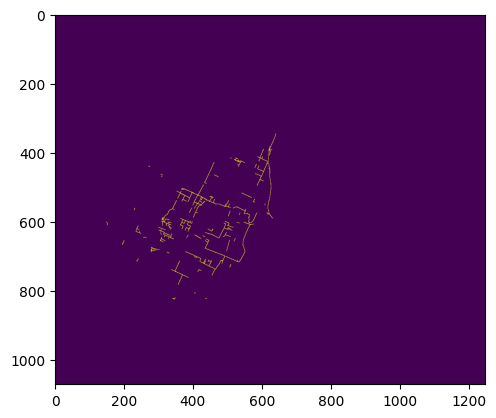

Axes(0.176343,0.11;0.672313x0.77)
 
Red_Gas_Natural_Distribucion:


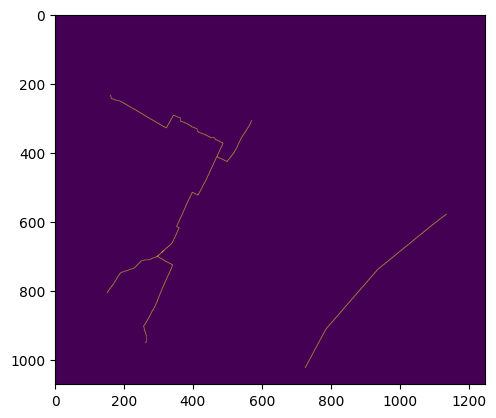

Axes(0.176343,0.11;0.672313x0.77)
 
Red_Energia_Baja_Tension:


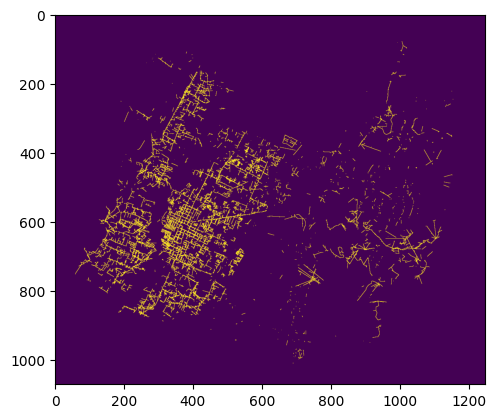

Axes(0.176343,0.11;0.672313x0.77)
 
Areas_excluidas_Proteccion_Hidrica_Ronda_Quebradas:


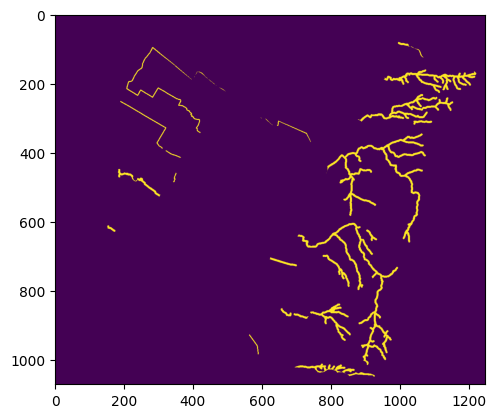

Axes(0.176343,0.11;0.672313x0.77)
 
Areas_excluidas_Zona_Proteccion:


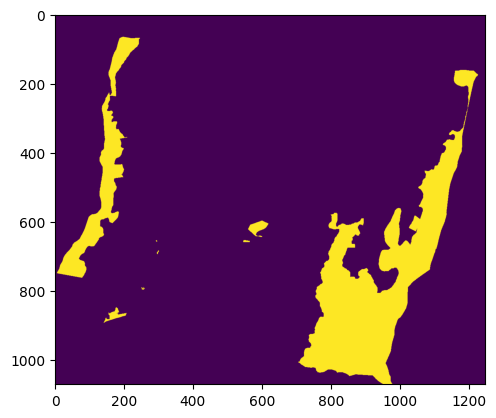

Axes(0.176343,0.11;0.672313x0.77)
 
Sentinel2_MSI_Level2A_Chiia_2018_B4:


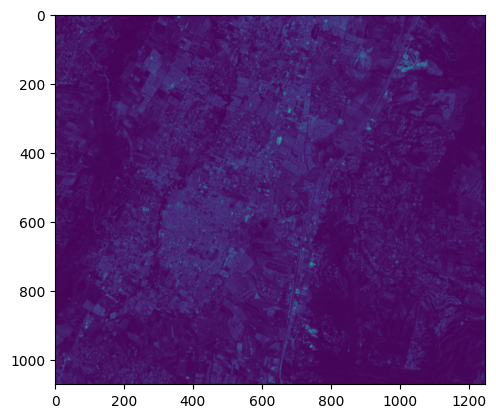

Axes(0.176343,0.11;0.672313x0.77)
 
Sentinel2_MSI_Level2A_Chiia_2018_B3:


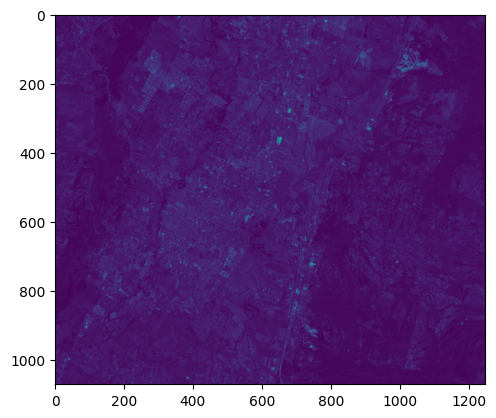

Axes(0.176343,0.11;0.672313x0.77)
 
Sentinel2_MSI_Level2A_Chiia_2018_B2:


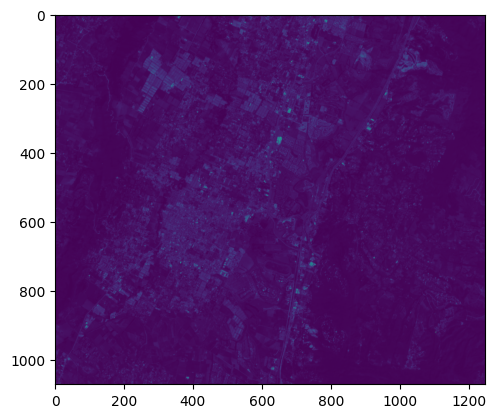

Axes(0.176343,0.11;0.672313x0.77)
 


In [32]:
for nom in capas:
  print( nom + ':' )
  print( show(globals()[ nom ]) )
  print( ' ' )

Se imprimen los valores máximo y mínimo de las capas originales en los ráster, solo para chequearlos.

In [33]:
for nom in capas:
  print( nom + ' mínimo:' )
  print( np.min(globals()[ nom ]) )
  print( nom + ' máximo:' )
  print( np.max(globals()[ nom ]) )
  print( ' ' )

Areas_excluidas_Proteccion_Hidrica_Rond_Rio mínimo:
0
Areas_excluidas_Proteccion_Hidrica_Rond_Rio máximo:
1
 
Areas_excluidas_Proteccion_Hidrica_Ronda_Humedales mínimo:
0
Areas_excluidas_Proteccion_Hidrica_Ronda_Humedales máximo:
1
 
Areas_excluidas_Proteccion_Hidrica_Ronda_Nacimientos mínimo:
0
Areas_excluidas_Proteccion_Hidrica_Ronda_Nacimientos máximo:
1
 
Red_Energia_Alta_Tension mínimo:
0
Red_Energia_Alta_Tension máximo:
1
 
Red_Acueducto_Diam_Menor_60 mínimo:
0
Red_Acueducto_Diam_Menor_60 máximo:
1
 
Red_Alcantarillado_Combinado mínimo:
0
Red_Alcantarillado_Combinado máximo:
1
 
Red_Acueducto_Diam_Mayor_60 mínimo:
0
Red_Acueducto_Diam_Mayor_60 máximo:
1
 
Red_Energia_Media_Tension mínimo:
0
Red_Energia_Media_Tension máximo:
1
 
Areas_excluidas_Cuerpo_Agua mínimo:
0
Areas_excluidas_Cuerpo_Agua máximo:
1
 
Red_Alcantarillado_Sanitario mínimo:
0
Red_Alcantarillado_Sanitario máximo:
1
 
DEM_correccion mínimo:
2557
DEM_correccion máximo:
3249
 
Areas_excluidas_Resguardo mínimo:
0
Area

Se imprimen las dimensiones de las capas (Deben ser iguales todas), solo para chequear.

In [34]:
for nom in capas:
  print( nom + ':' )
  print( globals()[ nom ].shape )
  print( ' ' )

Areas_excluidas_Proteccion_Hidrica_Rond_Rio:
(1072, 1248)
 
Areas_excluidas_Proteccion_Hidrica_Ronda_Humedales:
(1072, 1248)
 
Areas_excluidas_Proteccion_Hidrica_Ronda_Nacimientos:
(1072, 1248)
 
Red_Energia_Alta_Tension:
(1072, 1248)
 
Red_Acueducto_Diam_Menor_60:
(1072, 1248)
 
Red_Alcantarillado_Combinado:
(1072, 1248)
 
Red_Acueducto_Diam_Mayor_60:
(1072, 1248)
 
Red_Energia_Media_Tension:
(1072, 1248)
 
Areas_excluidas_Cuerpo_Agua:
(1072, 1248)
 
Red_Alcantarillado_Sanitario:
(1072, 1248)
 
DEM_correccion:
(1072, 1248)
 
Areas_excluidas_Resguardo:
(1072, 1248)
 
Censo_DANE_2018_Count_Pixel:
(1072, 1248)
 
Red_Gas_Natural_Domiciliaria1:
(1072, 1248)
 
Red_Alcantarillado_Pluvial:
(1072, 1248)
 
Red_Gas_Natural_Distribucion:
(1072, 1248)
 
Red_Energia_Baja_Tension:
(1072, 1248)
 
Areas_excluidas_Proteccion_Hidrica_Ronda_Quebradas:
(1072, 1248)
 
Areas_excluidas_Zona_Proteccion:
(1072, 1248)
 
Sentinel2_MSI_Level2A_Chiia_2018_B4:
(1072, 1248)
 
Sentinel2_MSI_Level2A_Chiia_2018_B3:
(10

# 3. Escalar capas de información entre 0 y 1 excepto la capa de CNPV2018

Se escalan los valores de cada capa en el rango 0 a 1 debido a que es un requisito para los datasets de las redes neuronales en general (escalar o normalizar). Se aplica a cada capa a incluir en la selección de características.

La ecuación de escalado aplica al valor de cada fila, columna y capa. El máximo y mínimo se calcula para cada capa.

In [35]:
capas_sin_censo = [x for x in capas if x != 'Censo_DANE_2018_Count_Pixel']

In [36]:
capas_sin_censo

['Areas_excluidas_Proteccion_Hidrica_Rond_Rio',
 'Areas_excluidas_Proteccion_Hidrica_Ronda_Humedales',
 'Areas_excluidas_Proteccion_Hidrica_Ronda_Nacimientos',
 'Red_Energia_Alta_Tension',
 'Red_Acueducto_Diam_Menor_60',
 'Red_Alcantarillado_Combinado',
 'Red_Acueducto_Diam_Mayor_60',
 'Red_Energia_Media_Tension',
 'Areas_excluidas_Cuerpo_Agua',
 'Red_Alcantarillado_Sanitario',
 'DEM_correccion',
 'Areas_excluidas_Resguardo',
 'Red_Gas_Natural_Domiciliaria1',
 'Red_Alcantarillado_Pluvial',
 'Red_Gas_Natural_Distribucion',
 'Red_Energia_Baja_Tension',
 'Areas_excluidas_Proteccion_Hidrica_Ronda_Quebradas',
 'Areas_excluidas_Zona_Proteccion',
 'Sentinel2_MSI_Level2A_Chiia_2018_B4',
 'Sentinel2_MSI_Level2A_Chiia_2018_B3',
 'Sentinel2_MSI_Level2A_Chiia_2018_B2']

In [37]:
for nom in capas_sin_censo:
  max_capa = np.max(globals()[ nom ])
  min_capa = np.min(globals()[ nom ])

globals()[ nom ] = (globals()[ nom ]-min_capa)/(max_capa-min_capa)

Se chequean los valores máximo y mínimo de las capas escaladas, todos tienen que estar entre cero y uno (Sin incluir la capa de cnpv2018, aunque esa ya es así).

In [38]:
for nom in capas:
  print( nom + ' mínimo:' )
  print( np.min(globals()[ nom ]) )
  print( nom + ' máximo:' )
  print( np.max(globals()[ nom ]) )
  print( ' ' )

Areas_excluidas_Proteccion_Hidrica_Rond_Rio mínimo:
0
Areas_excluidas_Proteccion_Hidrica_Rond_Rio máximo:
1
 
Areas_excluidas_Proteccion_Hidrica_Ronda_Humedales mínimo:
0
Areas_excluidas_Proteccion_Hidrica_Ronda_Humedales máximo:
1
 
Areas_excluidas_Proteccion_Hidrica_Ronda_Nacimientos mínimo:
0
Areas_excluidas_Proteccion_Hidrica_Ronda_Nacimientos máximo:
1
 
Red_Energia_Alta_Tension mínimo:
0
Red_Energia_Alta_Tension máximo:
1
 
Red_Acueducto_Diam_Menor_60 mínimo:
0
Red_Acueducto_Diam_Menor_60 máximo:
1
 
Red_Alcantarillado_Combinado mínimo:
0
Red_Alcantarillado_Combinado máximo:
1
 
Red_Acueducto_Diam_Mayor_60 mínimo:
0
Red_Acueducto_Diam_Mayor_60 máximo:
1
 
Red_Energia_Media_Tension mínimo:
0
Red_Energia_Media_Tension máximo:
1
 
Areas_excluidas_Cuerpo_Agua mínimo:
0
Areas_excluidas_Cuerpo_Agua máximo:
1
 
Red_Alcantarillado_Sanitario mínimo:
0
Red_Alcantarillado_Sanitario máximo:
1
 
DEM_correccion mínimo:
2557
DEM_correccion máximo:
3249
 
Areas_excluidas_Resguardo mínimo:
0
Area

# 4. Redimensionar datos

Esta parte realiza un reshape de la matriz tridimensional, de forma que cada píxel esté representado por una fila y cada capa este representado por una columna.

In [39]:
tabla_datos = []
for nom in ['Censo_DANE_2018_Count_Pixel']+capas_sin_censo:
  tabla_datos.append(globals()[nom])
tabla_datos = np.swapaxes(tabla_datos,0,2)
tabla_datos = pd.DataFrame(tabla_datos.reshape(tabla_datos.shape[0]*tabla_datos.shape[1],tabla_datos.shape[2]))
tabla_datos = tabla_datos.rename(columns=dict(zip(range(len(capas)), ['Censo_DANE_2018_Count_Pixel']+capas_sin_censo)))

Las matrices obtenidas se convierten a DataFrame de Pandas.

In [40]:
X_rf = tabla_datos.drop(['Censo_DANE_2018_Count_Pixel'], axis=1)
y_rf = tabla_datos['Censo_DANE_2018_Count_Pixel']

Se verifica el tamaño de la matriz de datos (bidimensional) para el modelo Random Forest y PCA.

In [41]:
X_rf.shape

(1337856, 21)

In [42]:
y_rf.shape

(1337856,)

In [43]:
Censo_DANE_2018_Count_Pixel.shape[0]*Censo_DANE_2018_Count_Pixel.shape[1]

1337856

In [44]:
X_rf.shape[1]

21

# 5. Selección de características por Random Forest

Se escoge una semilla de forma que la salida de los modelos sea replicable y sin ningún cambio, ya que los algoritmos de ajuste de los modelos inicializan algunos de sus hiperparámetros con valores aleatorios.

In [45]:
random.seed(1234)

Se declara y se ajusta el modelo Random Forest. Este proceso tarda.

In [46]:
rf_fs = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf_fs.fit(X_rf, y_rf)

RandomForestRegressor(n_jobs=-1)

Se grafican los niveles de importancia de las capas explicativas.

/usr/local/lib/python3.11/dist-packages/rfpimp.py:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


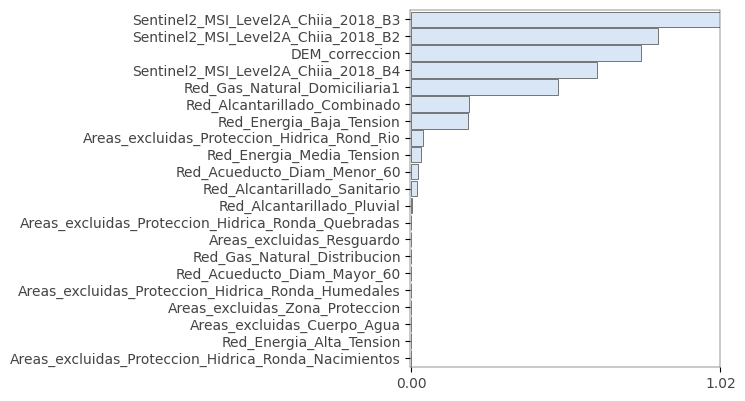

In [47]:
imp = importances(rf_fs, X_rf, y_rf)
viz = plot_importances(imp)
viz.view()

Para efectos de seleccionar características para un posterior entrenamiento de un modelo predicctivo, estas salidas son susceptibles de ser interpretadas.

# 6. Selección de características por PCA

Estos son parámetros para los gráficos del PCA.

In [48]:
plt.rcParams.update({'font.size': 2})
plt.rcParams["figure.figsize"] = (3.2,2.4)#(6.4,4.8)
plt.rcParams["figure.dpi"] = 90
plt.rcParams['axes.labelsize'] = 2
plt.rcParams['axes.titlesize'] = 2

Se estandarizan las columnas (variables).

In [49]:
pca_yX_stand = StandardScaler().fit_transform(tabla_datos)

In [50]:
pca_yX_stand

array([[-0.17519687, -0.22083539, -0.05406369, ...,  0.26331386,
         0.09418416,  0.03285002],
       [-0.17519687, -0.22083539, -0.05406369, ..., -0.08930784,
        -0.30104115, -0.16201629],
       [-0.17519687, -0.22083539, -0.05406369, ..., -0.04437544,
        -0.44202091, -0.05994346],
       ...,
       [-0.17519687, -0.22083539, -0.05406369, ...,  0.70970754,
         0.2086549 ,  0.10973605],
       [-0.17519687, -0.22083539, -0.05406369, ...,  0.67356626,
         0.24239365,  0.16010966],
       [-0.17519687, -0.22083539, -0.05406369, ...,  0.60909802,
         0.2652878 ,  0.27146184]])

In [51]:
pca_yX_stand.shape

(1337856, 22)

Se ajusta el PCA.

In [52]:
dim_r = PCA()
dim_r.fit(pca_yX_stand[:,1:])

PCA()

Se obtienen las salidas gráficas y se seleccionan el número de componentes a analizar con la eurística del codo en la gráfica de la varianza explicada por cada componente principal.

In [53]:
pc_list = ["PC"+str(i) for i in list(range(1, dim_r.n_features_in_+1))]
cluster.screeplot(obj=[pc_list, dim_r.explained_variance_ratio_])

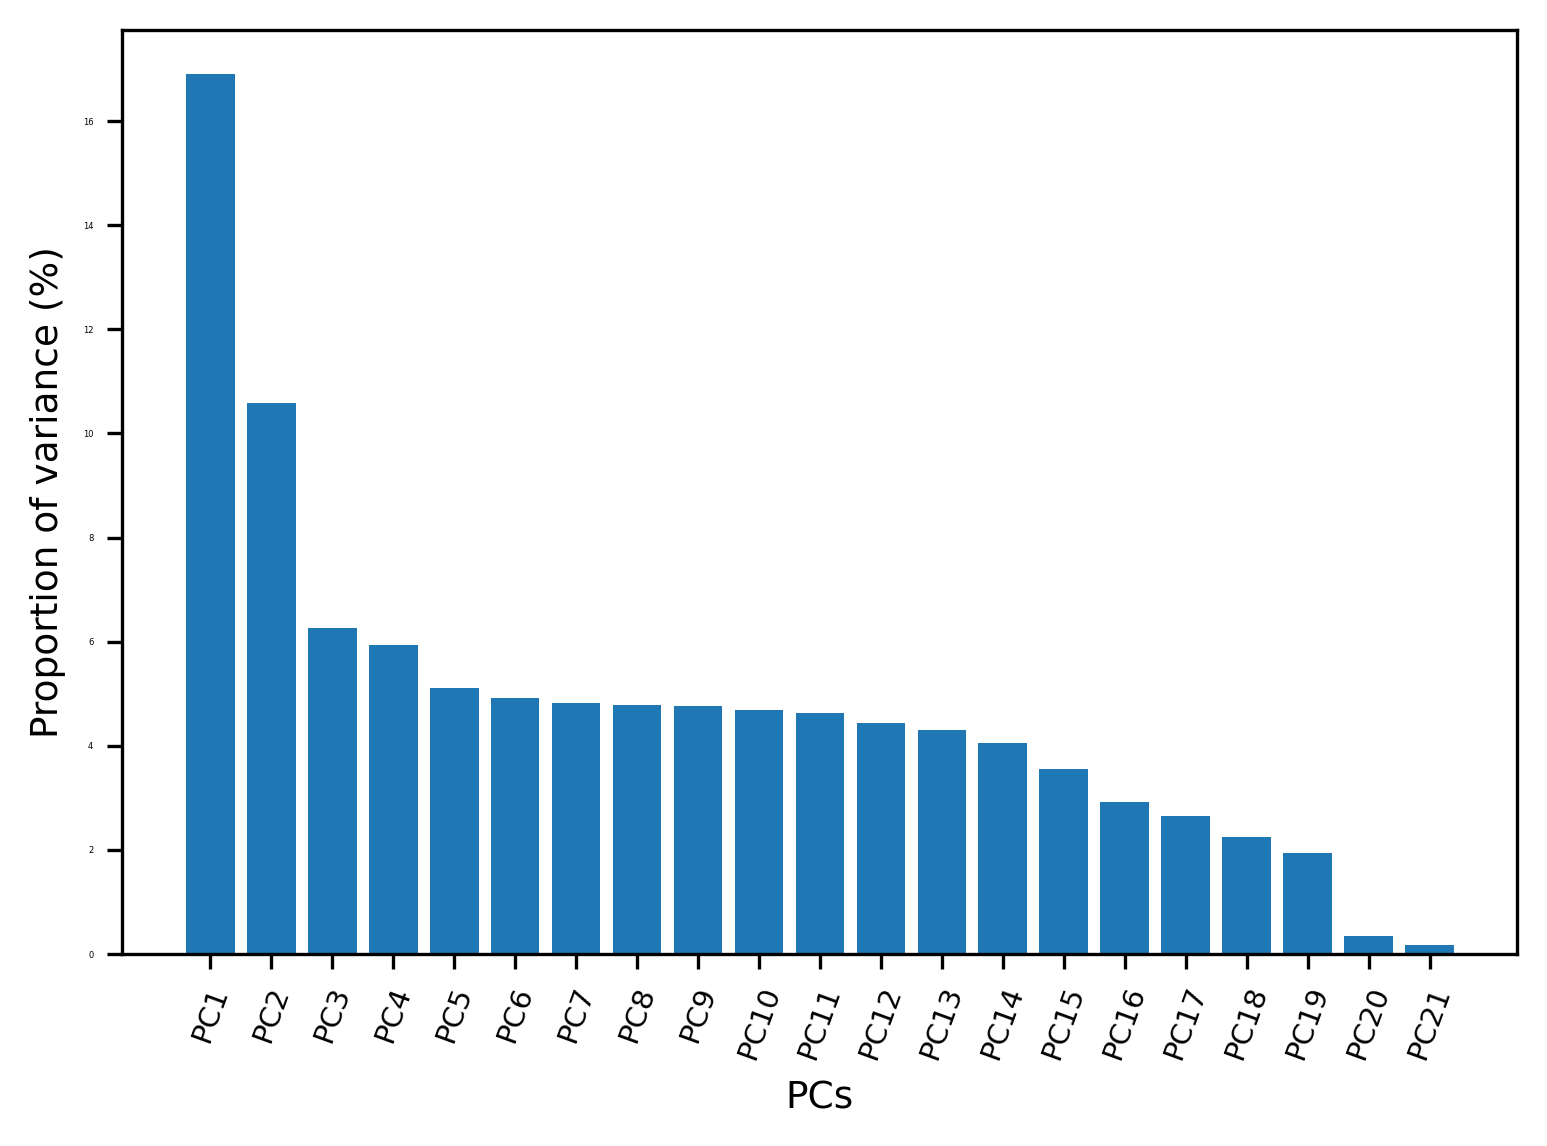

In [54]:
display(Image('/content/screeplot.png', width=700))

Se grafica el biplot.

In [55]:
cluster.biplot(
    cscore=pca_yX_stand,
    loadings=dim_r.components_,
    labels=tabla_datos.columns.values,
    var1=round(dim_r.explained_variance_ratio_[0]*100, 2),
    var2=round(dim_r.explained_variance_ratio_[1]*100, 2)
)

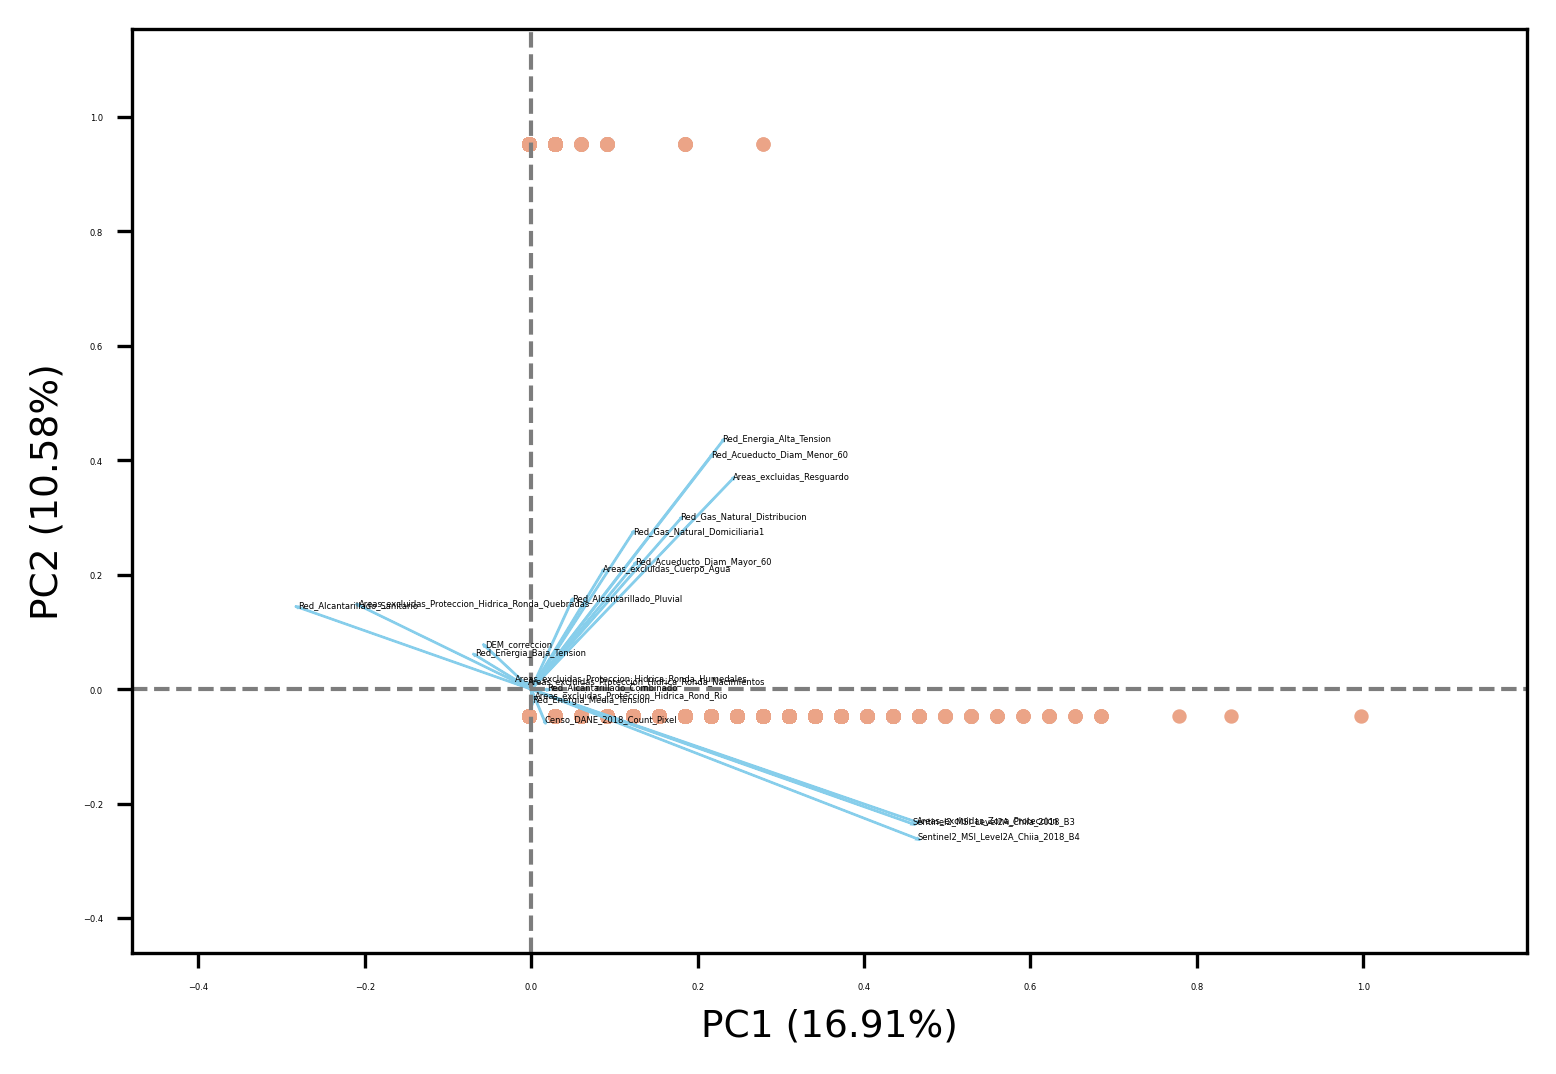

In [56]:
display(Image('/content/biplot_2d.png', width=1000))

Para efectos de seleccionar características para un posterior entrenamiento de un modelo predicctivo, estas salidas son susceptibles de ser interpretadas.